Importing all the necessary libraries and graph configurations

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\komno\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

In [6]:
df = pd.read_csv("../Dataset/Student_Performance.csv")

Know about data

In [7]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Checking if null values are present

In [9]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

No null values

Statistics of data

In [10]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
df.describe(include=object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


## Univariate Analysis

In [23]:
def count_plot(column):
    unique_values = df[column].nunique()
    palette = sns.color_palette("husl", unique_values)
    ax = sns.countplot(
        data=df,
        x=column,
        order=df[column].value_counts().index,
        palette=palette,
    )
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

C:\Users\komno\AppData\Local\Temp\ipykernel_19220\1464265915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


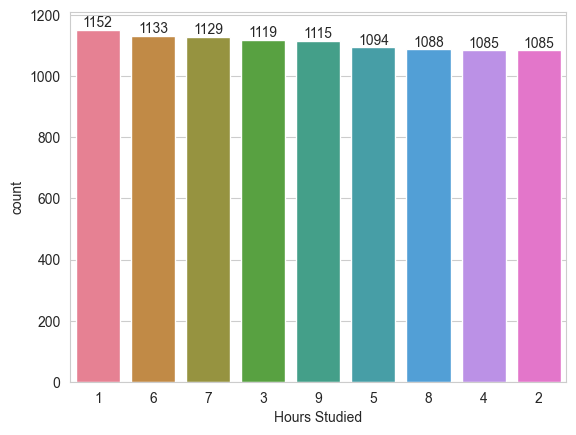

In [24]:
count_plot("Hours Studied")

Most Students study 1 hour

C:\Users\komno\AppData\Local\Temp\ipykernel_19220\3544595415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


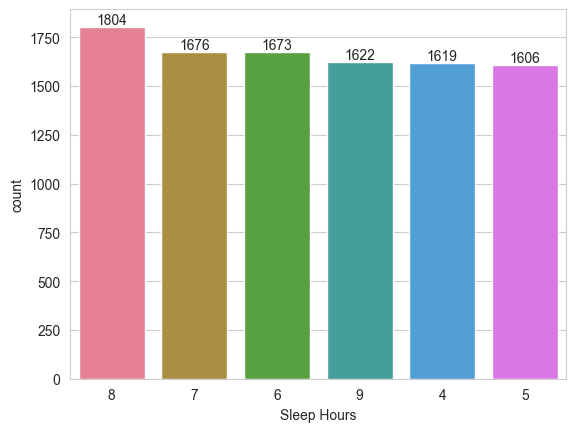

In [14]:
count_plot("Sleep Hours")

- Most student Sleep 8 hours
- Other students sleep Similar numbers of hours

C:\Users\komno\AppData\Local\Temp\ipykernel_19220\3544595415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


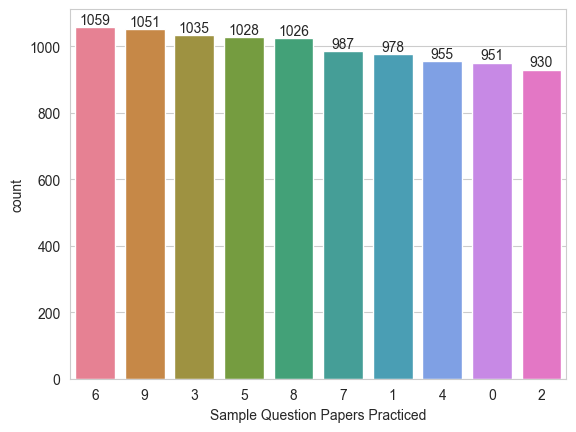

In [15]:
count_plot("Sample Question Papers Practiced")

- All student have Similar The number of sample question papers the practiced.
- There are 900+ students who did not practice any questions

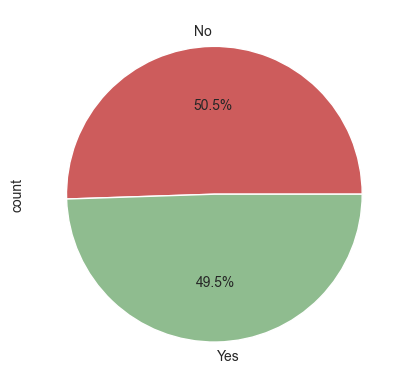

In [16]:
df["Extracurricular Activities"].value_counts().plot(
    kind="pie",
    y="Extracurricular Activities",
    autopct="%1.1f%%",
    colors=["#CD5C5C", "#8FBC8F"],
)
plt.show()

Most student "don't" participate in extracurricular activities

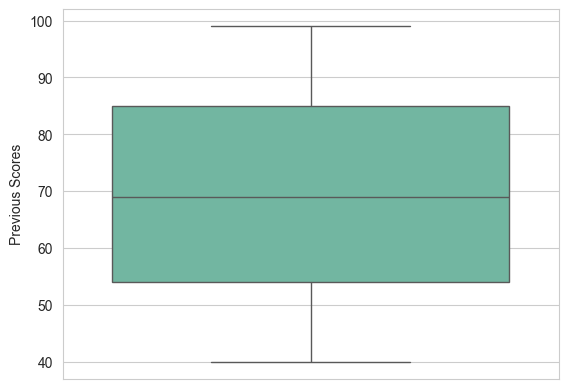

In [17]:
sns.boxplot(data=df, y="Previous Scores")
plt.show()

- 50% of students scored above 65
- No student obtained the final grade

## Bivariate Analysis

C:\Users\komno\AppData\Local\Temp\ipykernel_19220\3983628871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


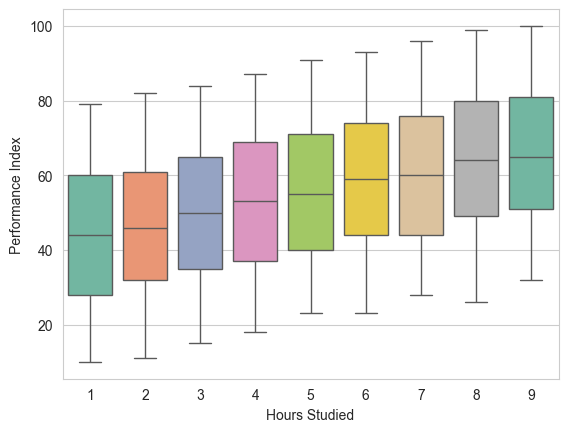

In [28]:
unique_values = df["Hours Studied"].nunique()
sns.boxplot(
    data=df,
    x="Hours Studied",
    y="Performance Index",
    palette=sns.color_palette("Set2", unique_values),
)
plt.show()

As we can see, the more hours you study, the greater the success rate

C:\Users\komno\AppData\Local\Temp\ipykernel_19220\105219674.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


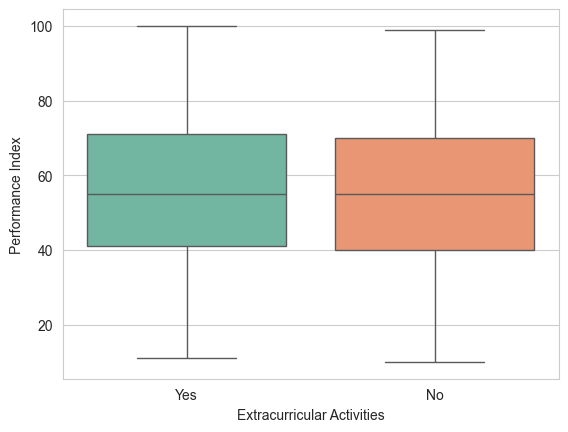

In [31]:
sns.boxplot(
    data=df,
    x="Extracurricular Activities",
    y="Performance Index",
    palette=sns.color_palette("Set2", 2),
)
plt.show()

- Participation in extracurricular activities helps to a very small extent in obtaining higher grades

<Axes: xlabel='Hours Studied'>

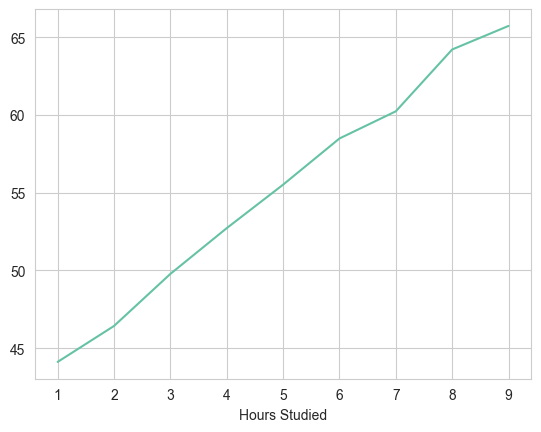

In [32]:
df.groupby("Hours Studied")["Performance Index"].mean().plot()

Sleep is important for Performance index.

<Axes: >

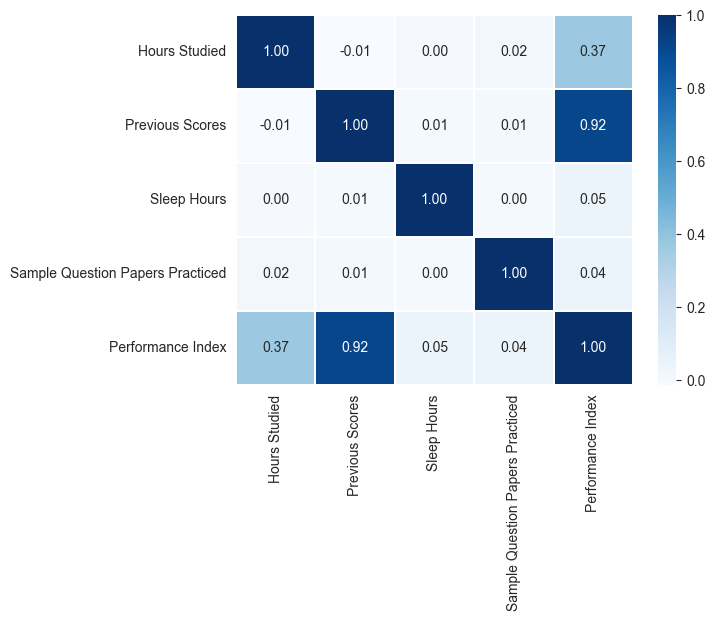

In [39]:
sns.heatmap(
    df.select_dtypes(exclude=object).corr(),
    annot=True,
    fmt=".2f",
    linewidths=0.2,
    cmap="Blues",
)

There's a lot of Strong Positive Relationships between Performance Index and Features